In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

# Load the data

In [2]:
X_train  = pd.read_csv("train.csv")
X_test  = pd.read_csv("test.csv")
print(X_test.shape)
print(X_train.shape)

(10204, 3)
(20715, 3)


# Preprocessing data
### Conversion to lower case 
### Removal of duplicates

In [3]:
def convert_To_Lower_case(x):
    return x.lower()

In [4]:
def preprocess(data):
    data['Query'] = data['Query'].apply(convert_To_Lower_case)
    boolean = data.duplicated(subset = ['Query','label'])
    data.drop_duplicates(subset = ['Query','label'],inplace = True)
    #dropping the few queries which has both the label to avoid ambiguity
    data.drop_duplicates(subset = ['Query'],keep = False,inplace = True)
    return data
    

In [5]:
X_train = preprocess(X_train)
X_train.shape

(20698, 3)

In [6]:
X_test = preprocess(X_test)
X_test.shape

(10200, 3)

# Creating all the features that were analysed during eda

In [7]:
def number_of_single_quotations(x):
    list_single_quotes = re.findall("'",x)
    return len(list_single_quotes)

def number_of_double_quotations(x):
    list_double_quotes = re.findall("\"",x)
    return len(list_double_quotes)

def number_of_hash(x):
    list_hash = re.findall("#",x)
    return len(list_hash)

def number_of_dollar(x):
    list_dollar = re.findall("$",x)
    return len(list_dollar)

def number_of_paranthesis(x):
    list_paranthesis = re.findall("\(|\)",x)
    return len(list_paranthesis)

def number_of_square_brackets(x):
    list_square_brackets = re.findall("\[|\]",x)
    return len(list_square_brackets)

def number_of_at_symbol(x):
    list_at_symbol = re.findall("@",x)
    return len(list_at_symbol)

def number_of_colon(x):
    list_colon = re.findall(":",x)
    return len(list_colon)

def number_of_semicolon(x):
    list_semicolon = re.findall(";",x)
    return len(list_semicolon)

def number_of_equals(x):
    list_equals = re.findall("=",x)
    return len(list_equals)

def number_of_angular_brackets(x):
    list_angular_brackets = re.findall("<|>",x)
    return len(list_angular_brackets)

def number_of_question_mark(x):
    list_question_mark = re.findall("\?",x)
    return len(list_question_mark)

def number_of_under_score(x):
    list_under_score = re.findall("\_",x)
    return len(list_under_score)

def number_of_arithematic(x):
    list_arithematic = re.findall("\+|-|[^\/]\*|\/[^\*]",x)
    return len(list_arithematic)

def number_of_comma(x):
    list_comma = re.findall(",",x)
    return len(list_comma)

def number_of_dot(x):
    list_dot = re.findall("\.",x)
    return len(list_dot)

def number_of_single_comment(x):
    list_single_comment = re.findall("(--)",x)
    return len(list_single_comment)

def number_of_white_space(x):
    list_white_space = re.findall("\s+",x)
    return len(list_white_space)

def number_of_percentage(x):
    list_percentage = re.findall("%",x)
    return len(list_percentage)

def number_of_logical_operators(x):
    list_logical_operators = re.findall("\snot\s|\sand\s|\sor\s|\sxor\s|&&|\|\||!",x)
    return len(list_logical_operators)

def number_of_punctuation(x):
    list_punctuation = re.findall("[!\"#$%&\'()*+,-.\/:;<=>?@[\\]^_`{|}~]",x)
    return len(list_punctuation)

def number_of_hexadecimal(x):
    list_hexadecimal = re.findall("0[xX][0-9a-fA-F]+\s",x)
    return len(list_hexadecimal)

def number_of_null(x):
    list_null = re.findall("null",x)
    return len(list_null)

def number_of_digits(x):
    list_digits = re.findall("[0-9]",x)
    return len(list_digits)

def number_of_alfabets(x):
    list_alfabets = re.findall("[a-zA-Z]",x)
    return len(list_alfabets)

In [8]:
def create_features(data):
    data['number_single_quotes'] = data.Query.apply(number_of_single_quotations)
    data['number_double_quotes'] = data.Query.apply(number_of_double_quotations) 
    data['number_hash'] = data.Query.apply(number_of_hash) 
    data['number_dollar'] = data.Query.apply(number_of_dollar)
    data['number_paranthesis'] = data.Query.apply(number_of_paranthesis)
    data['number_square_brackets'] = data.Query.apply(number_of_square_brackets)
    data['number_at_symbol'] = data.Query.apply(number_of_at_symbol)
    data['number_colon'] = data.Query.apply(number_of_colon)
    data['number_semicolon'] = data.Query.apply(number_of_semicolon)
    data['number_equals'] = data.Query.apply(number_of_equals)
    data['number_angular_brackets'] = data.Query.apply(number_of_angular_brackets)
    data['number_question_mark'] = data.Query.apply(number_of_question_mark)
    data['number_under_score'] = data.Query.apply(number_of_under_score)
    data['number_arithematic'] = data.Query.apply(number_of_arithematic)
    data['number_comma'] = data.Query.apply(number_of_comma)
    data['number_dot'] = data.Query.apply(number_of_dot)
    data['number_single_comment'] = data.Query.apply(number_of_single_comment)
    data['number_white_space'] = data.Query.apply(number_of_white_space) 
    data['number_percentage'] = data.Query.apply(number_of_percentage) 
    data['number_logical_operators'] = data.Query.apply(number_of_logical_operators) 
    data['number_punctuation'] = data.Query.apply(number_of_punctuation)
    data['number_hexadecimal'] = data.Query.apply(number_of_hexadecimal)
    data['number_null'] = data.Query.apply(number_of_null)
    data['number_digits'] = data.Query.apply(number_of_digits)
    data['number_alfabets'] = data.Query.apply(number_of_alfabets)
    return data

In [9]:
X_train = create_features(X_train)

In [10]:
X_train.shape

(20698, 28)

In [11]:
X_train.head()

,Unnamed: 0,Query,label,number_single_quotes,number_double_quotes,number_hash,number_dollar,number_paranthesis,number_square_brackets,number_at_symbol,...,number_dot,number_single_comment,number_white_space,number_percentage,number_logical_operators,number_punctuation,number_hexadecimal,number_null,number_digits,number_alfabets
0,11352,elias pallares,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,13
1,25664,"select duck, nearby+ ', ' + quiet+ ' ' + wi...",0,6,0,0,1,0,0,0,...,0,0,19,0,0,15,0,0,0,54
2,18391,40359,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3,8464,1' in boolean mode ) and 6510 = ( sele...,1,1,0,1,1,5,0,0,...,0,0,31,0,1,15,0,0,12,122
4,28448,select * from parallel where felt = 'examine',0,2,0,0,1,0,0,0,...,0,0,7,0,0,4,0,0,0,34


In [12]:
X_test = create_features(X_test)

In [13]:
X_test.shape

(10200, 28)

In [14]:
X_test.head()

,Unnamed: 0,Query,label,number_single_quotes,number_double_quotes,number_hash,number_dollar,number_paranthesis,number_square_brackets,number_at_symbol,...,number_dot,number_single_comment,number_white_space,number_percentage,number_logical_operators,number_punctuation,number_hexadecimal,number_null,number_digits,number_alfabets
0,10458,"1"" ) ) ) or 6793 = ( select 67...",1,0,4,0,1,10,0,0,...,0,0,22,0,2,17,0,0,10,30
1,12553,newtell@theroxyblue.ir,0,0,0,0,1,0,0,1,...,1,0,0,0,0,2,0,0,0,20
2,10017,1 ) as qzif where 7877 = 7877 union all s...,1,0,0,0,1,1,0,0,...,0,1,11,0,0,10,0,7,9,53
3,689,%2a%28%7c%28mail%3d%2a%29%29,1,0,0,0,1,0,0,0,...,0,0,0,8,0,8,0,0,12,8
4,29732,select * from tin order by minute desc,0,0,0,0,1,0,0,0,...,0,0,7,0,0,1,0,0,0,30


# Saving the file with new features

In [15]:
X_train.to_csv("Preprocessed_X_train.csv",index = False)
X_test.to_csv("Preprocessed_X_test.csv",index = False)


# Load the saved file

In [16]:
X_train = pd.read_csv("Preprocessed_X_train.csv")
X_test = pd.read_csv("Preprocessed_X_test.csv")

In [17]:
Y_train = X_train['label']
X_train = X_train.drop(['label'],axis = 1)
Y_test = X_test['label']
X_test = X_test.drop(['label'],axis = 1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20698, 27)
(10200, 27)
(20698,)
(10200,)


# Creating BoW for query column

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),max_features = 50000)
X = vectorizer.fit(X_train['Query'])
X_train_query = X.transform(X_train['Query'])
X_test_query = X.transform(X_test['Query'])

In [20]:
len(X.vocabulary_)

50000

In [21]:
X_train = X_train.drop(['Query','Unnamed: 0'],axis =1 )
X_test = X_test.drop(['Query','Unnamed: 0'],axis =1 )

In [22]:
X_train.head(5)

,number_single_quotes,number_double_quotes,number_hash,number_dollar,number_paranthesis,number_square_brackets,number_at_symbol,number_colon,number_semicolon,number_equals,...,number_dot,number_single_comment,number_white_space,number_percentage,number_logical_operators,number_punctuation,number_hexadecimal,number_null,number_digits,number_alfabets
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13
1,6,0,0,1,0,0,0,0,0,0,...,0,0,19,0,0,15,0,0,0,54
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3,1,0,1,1,5,0,0,0,0,1,...,0,0,31,0,1,15,0,0,12,122
4,2,0,0,1,0,0,0,0,0,1,...,0,0,7,0,0,4,0,0,0,34


# Combining all the features

In [23]:
from scipy.sparse import hstack
X_train = hstack((X_train,X_train_query)).tocsr()
X_test = hstack((X_test,X_test_query)).tocsr()

In [24]:
X_train.shape

(20698, 50025)

In [25]:
X_train

<20698x50025 sparse matrix of type '<class 'numpy.int64'>'
	with 406886 stored elements in Compressed Sparse Row format>

# Applying a baseline model( Logistic regression)

In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(n_jobs=-1,loss = 'log').fit(X_train,Y_train)

In [28]:
classifier.score(X_test, Y_test)

0.9715686274509804

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
confusionMatrix = confusion_matrix(Y_train,classifier.predict(X_train))

In [31]:
print(confusionMatrix)

[[13079     2]
 [   41  7576]]


In [32]:
def display_confusion_matrix(CM):
    sns.heatmap(CM, annot=True,fmt="d",cmap='Blues',xticklabels = ['No','Yes'],yticklabels=['No','Yes'])
def get_F_1_Score(CM):
    TP = CM[1][1]
    TN = CM[0][0]
    FP = CM[1][0]
    FN = CM[0][1]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = (2*precision*recall)/(precision+recall)
    return f1_score

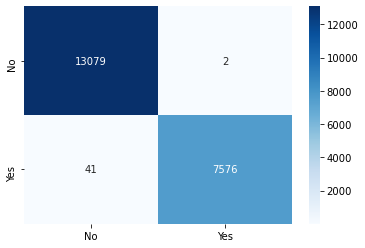

In [33]:
display_confusion_matrix(confusionMatrix)

In [34]:
print(get_F_1_Score(confusionMatrix))

0.9971701217505758


In [98]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [102]:
def LR_RandonSearchCV(X_Tr,Y_Train):
    Classifier =   LogisticRegression()
    Distributions = dict(C = [0.00001,0.0005, 0.0001,0.001,0.01,0.1,1,10,100])
    Classification_RS = RandomizedSearchCV(Classifier, Distributions, cv = 3,scoring = 'roc_auc',n_jobs =-1,n_iter=14,return_train_score = True)
    Result_RS = Classification_RS.fit(X_Tr, Y_Train)
    Result = pd.DataFrame.from_dict(Result_RS.cv_results_)
    return Result,Result_RS

In [139]:
def plot_LR_results(Result,classifier):
    C = np.log(Result['param_C'].astype('float64'))
    Train_auc = Result['mean_train_score']
    CV_auc = Result['mean_test_score']
    plt.plot(C, Train_auc, label=' kernel Train AUC')
    plt.plot(C, CV_auc, label=' kernel CV AUC')
    plt.scatter(C, Train_auc, label='kernel Train AUC points')
    plt.scatter(C, CV_auc, label='kernel CV AUC points')

    plt.legend()
    plt.xlabel("C: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot(Train-CV Data)")
    plt.grid()
    plt.show()

In [104]:
Result_LR,classifier = LR_RandonSearchCV(X_train,Y_train)
print(Result_LR)

C:\Users\91985\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=14. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.312098      0.121433         0.026056        0.007229   1e-05   
1       2.055602      0.191665         0.015297        0.003599  0.0005   
2       1.914284      0.513090         0.026577        0.020519  0.0001   
3       1.681427      0.038159         0.041585        0.017537   0.001   
4       2.392063      0.099398         0.032229        0.009973    0.01   
5       3.936172      0.093466         0.014633        0.001388     0.1   
6       4.891327      0.821401         0.025710        0.004105       1   
7       6.474047      0.795543         0.021803        0.002008      10   
8       6.050201      0.418015         0.008460        0.003766     100   

          params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 1e-05}           0.997261           0.998567           0.998186   
1  {'C': 0.0005}           0.997336           0.998252           0.997894   
2  {'C': 0.0001}  

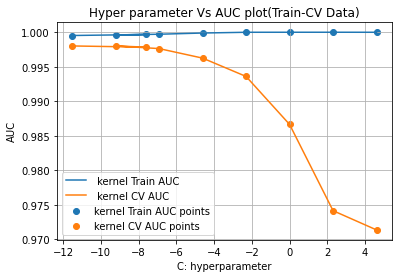

In [140]:
plot_LR_results(Result_LR,classifier)

##### Best Parameters:

In [116]:
print(classifier.best_params_)

{'C': 0.0001}


##### Train the classifier with the best parameters on the train- data and then Fit it on test data

In [121]:
Classifier_LR = LogisticRegression(C = 0.0001)
Classifier_LR.fit(X_train,Y_train)

LogisticRegression(C=0.0001)

In [122]:
Classifier_LR.score(X_test,Y_test)

0.9358823529411765

##### Get Confusion Matrix

In [130]:
confusionMatrix = confusion_matrix(Y_test,Classifier_LR.predict(X_test))

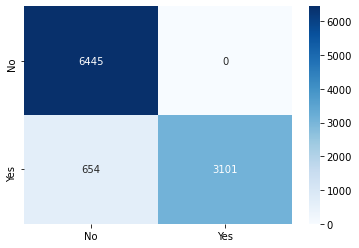

In [131]:
display_confusion_matrix(confusionMatrix)

In [132]:
tn, fp, fn, tp = confusionMatrix.ravel()

In [133]:
print(tn, fp, fn, tp)

6445 0 654 3101


##### F1-score

In [134]:
print(get_F_1_Score(confusionMatrix))

0.9046091015169195


### Observations:
#### True-Negative : 6445
#### True Positive: 3101
#### False Positive: 0
#### False Negative: 654

#### F1- Score: 0.90461


### SVM

In [175]:
def SVC_RandonSearchCV(X_Tr,Y_Train):
    Classifier =  SVC()
    Distributions = dict(C = [0.00001,0.0005, 0.0001,0.001,0.01,0.1,1,10,100],kernel =['linear','poly','rbf','sigmoid'])
    Classification_RS = RandomizedSearchCV(Classifier, Distributions, cv = 3,scoring = 'roc_auc',n_jobs =-1,n_iter=14,return_train_score = True)
    Result_RS = Classification_RS.fit(X_Tr, Y_Train)
    Result = pd.DataFrame.from_dict(Result_RS.cv_results_)
    return Result,Result_RS

In [176]:
def plot_SVM_results(Result):
    params = Result['params'].map(lambda x : str(x['C'])+","+str(x['kernel'][0:3]))
    Train_auc = Result['mean_train_score']
    CV_auc = Result['mean_test_score']
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.plot(params, Train_auc, label=' C,kernel Train AUC')
    plt.plot(params, CV_auc, label=' C,kernel CV AUC')
    plt.scatter(params, Train_auc, label='C,kernel Train AUC points')
    plt.scatter(params, CV_auc, label='C,kernel CV AUC points')
    plt.legend()
    plt.xlabel("C,kernel : hyperparameter")
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot(Train-CV Data)")
    plt.grid()
    plt.show()

In [177]:
#For Set 1
#Find the Hyperparameter using RandomSearchCv
Result_svm,classifier = SVC_RandonSearchCV(X_train,Y_train)
print(Result_svm[['param_C','param_kernel','mean_train_score','mean_test_score']])

   param_C param_kernel  mean_train_score  mean_test_score
0      0.1       linear          0.999874         0.977199
1      100      sigmoid          0.999649         0.989036
2      100         poly          0.999674         0.980599
3        1       linear          0.999857         0.955345
4       10         poly          0.999473         0.982281
5    0.001      sigmoid          0.999241         0.995840
6        1      sigmoid          0.999529         0.995914
7        1          rbf          0.996163         0.965495
8      100       linear          0.999877         0.945327
9   0.0001         poly          0.998254         0.985088
10  0.0005         poly          0.998076         0.984821
11  0.0005       linear          0.998944         0.986448
12  0.0005      sigmoid          0.999247         0.995830
13   1e-05          rbf          0.607453         0.596796


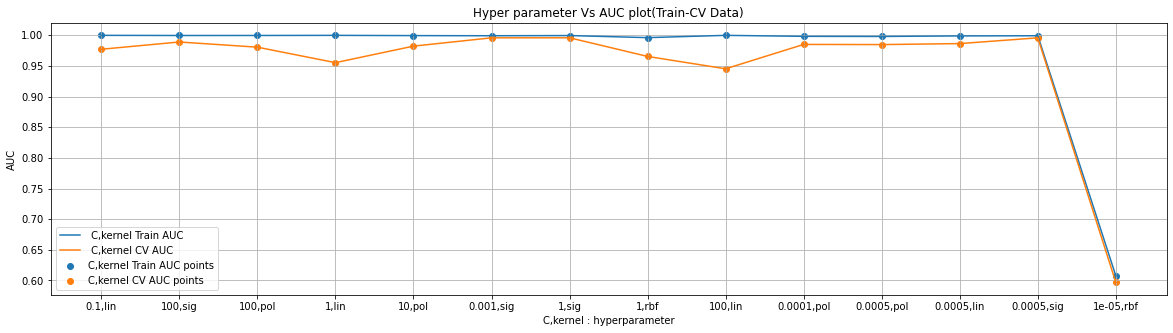

In [178]:
plot_SVM_results(Result_svm)

##### Best Parameters:

In [179]:
print(classifier.best_params_)

{'kernel': 'sigmoid', 'C': 1}


##### Train the classifier with the best parameters on the train- data and then Fit it on test data

In [180]:
Classifier =  SVC(kernel = 'sigmoid', C= 1)
Cls = Classifier.fit(X_train,Y_train)

In [181]:
Cls.score(X_test, Y_test)

0.9403921568627451

##### Get Confusion Matrix

In [182]:
confusionMatrix = confusion_matrix(Y_test,Cls.predict(X_test))

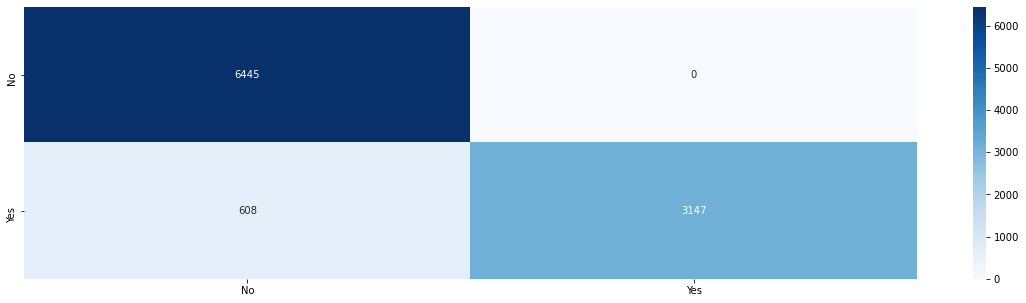

In [183]:
display_confusion_matrix(confusionMatrix)

##### Get F1-score

In [184]:
print(get_F_1_Score(confusionMatrix))

0.911909591422776


### Observations:
#### True-Negative : 6445
#### True Positive: 3147
#### False Positive: 0
#### False Negative: 608

#### F1- Score: 0.91191


### Naive Baye's


In [78]:
#Applying MultinomialClassification with RandomSearch CV
def multinomialNB_RandonSearchCV(X_Tr,Y_Train):
    Classifier =  MultinomialNB()
    Distributions = dict(alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100])
    Classification_RS = RandomizedSearchCV(Classifier, Distributions, cv = 9,scoring = 'roc_auc',n_jobs =-1,n_iter=14,return_train_score = True)
    Result_RS = Classification_RS.fit(X_Tr, Y_Train)
    Result = pd.DataFrame.from_dict(Result_RS.cv_results_)
    print(Result[['param_alpha','mean_train_score','mean_test_score']])
    Alpha = np.log(Result['param_alpha'].astype('float64'))
    Train_auc = Result['mean_train_score']
    CV_auc = Result['mean_test_score']

    plt.plot(Alpha, Train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

    plt.plot(Alpha, CV_auc, label='CV AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

    plt.scatter(Alpha, Train_auc, label='Train AUC points')
    plt.scatter(Alpha, CV_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot(Train-CV Data)")
    plt.grid()
    plt.show()
    print("Best alpha:" , Result_RS.best_params_['alpha'])
    return Result_RS.best_params_['alpha']

   param_alpha  mean_train_score  mean_test_score
0        1e-05          0.993055         0.903420
1       0.0005          0.993055         0.903742
2       0.0001          0.993055         0.903561
3        0.005          0.993045         0.904090
4        0.001          0.993055         0.903864
5         0.05          0.993037         0.904348
6         0.01          0.993043         0.904374
7          0.1          0.993036         0.904627
8          0.5          0.993041         0.903959
9            1          0.993039         0.904031
10           5          0.993438         0.903950
11          10          0.994792         0.903578
12          50          0.995346         0.962803
13         100          0.995913         0.972994


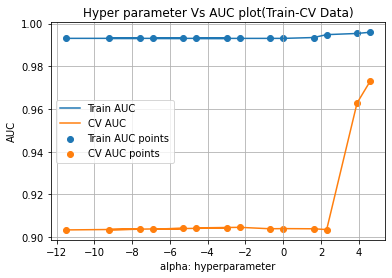

Best alpha: 100


In [79]:
#For Set 1
#Find the Hyperparameter using RandomSearchCv
BestParameter = multinomialNB_RandonSearchCV(X_train,Y_train)

##### Training the model with the best alpha

In [83]:
Classifier =  MultinomialNB(alpha = 100)
Result_RS = Classifier.fit(X_train,Y_train)
Classifier.score(X_test, Y_test)

0.9626470588235294

##### Generating the confusion matrix

In [84]:
confusionMatrix = confusion_matrix(Y_test,classifier.predict(X_test))

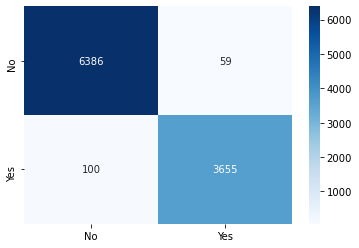

In [85]:
display_confusion_matrix(confusionMatrix)

##### Getting F1-Score

In [86]:
print(get_F_1_Score(confusionMatrix))

0.9787120096398447


### Observations:
#### True-Negative : 6386
#### True Positive: 3655
#### False Positive: 59
#### False Negative: 100

#### F1- Score: 0.97871


### XGBoost

In [51]:
import xgboost as xgb

In [54]:
def find_best_GBDT_classifier(X_train,Y_train,params):
    classifier = xgb.XGBClassifier()
    classifierGridSearch = RandomizedSearchCV(classifier,params,n_jobs=-1,cv =3,scoring = 'roc_auc',return_train_score=True)
    result_RS = classifierGridSearch.fit(X_train,Y_train)
    result = pd.DataFrame.from_dict(result_RS.cv_results_)
    return result,classifierGridSearch.best_params_

In [55]:
params = {'n_estimators':[5,10,50,75,100],'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3]}
cv_results_set_1,best_params_set_1 = find_best_GBDT_classifier(X_train,Y_train,params)
print("Best Found Parameters:\t",best_params_set_1)

C:\Users\91985\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Found Parameters:	 {'n_estimators': 100, 'learning_rate': 0.1}


In [74]:
def plot_XGBoost_results(Result):
    params = Result['params'].map(lambda x : str(x['n_estimators'])+","+str(x['learning_rate']))
    Train_auc = Result['mean_train_score']
    CV_auc = Result['mean_test_score']
    plt.plot(params, Train_auc, label=' kernel Train AUC')
    plt.plot(params, CV_auc, label=' kernel CV AUC')
    plt.scatter(params, Train_auc, label='kernel Train AUC points')
    plt.scatter(params, CV_auc, label='kernel CV AUC points')

    plt.legend()
    plt.xlabel("alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot(Train-CV Data)")
    plt.grid()
    plt.show()

<class 'pandas.core.series.Series'>


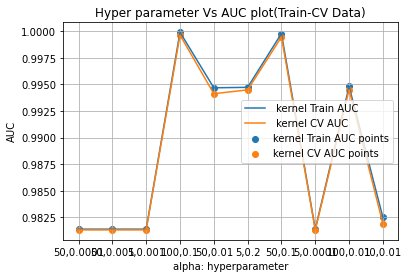

In [75]:
plot_XGBoost_results(cv_results_set_1)

##### Training the model with the best n_estimators and learning_rate

In [79]:
classifier = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)
classifier.fit(X_train,Y_train)
prediction = classifier.predict(X_test)

[14:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


##### Generating Confusion Matrix

In [80]:
confusionMatrix = confusion_matrix(Y_test,classifier.predict(X_test))

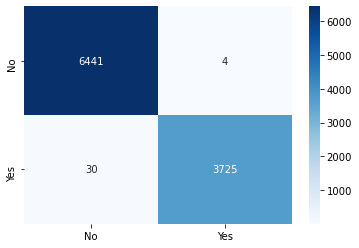

In [81]:
display_confusion_matrix(confusionMatrix)

##### Getting F1-score

In [82]:
print(get_F_1_Score(confusionMatrix))

0.9954569748797434


### Observations:
#### True-Negative : 6441
#### True Positive: 3725
#### False Positive: 4
#### False Negative: 30

#### F1- Score: 0.99547


# Observation:
## 1. The best model is XGBoost with the F1-score of 0.9954, we also see a very very low False positive rate and False negative rate and hence we can say that XGBoost is our best performing model.